In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from PIL import Image

In [32]:
pd.set_option('display.max.colwidth', 100)

In [3]:
!pwd

/opt/ml/code/data processing/EDA & Preprocessing


# train image csv 불러오기

In [5]:
train_image_data_df = pd.read_csv('/opt/ml/code/data processing/EDA & Preprocessing/train_image_info.csv')
train_image_data_df

,path,width,height,volume,channel
0,/opt/ml/code/data/train/images/000001_female_A...,384,512,25111,3.0
1,/opt/ml/code/data/train/images/000001_female_A...,384,512,25623,3.0
2,/opt/ml/code/data/train/images/000001_female_A...,384,512,23873,3.0
3,/opt/ml/code/data/train/images/000001_female_A...,384,512,24410,3.0
4,/opt/ml/code/data/train/images/000001_female_A...,384,512,22446,3.0
...,...,...,...,...,...
18895,/opt/ml/code/data/train/images/006959_male_Asi...,384,512,16943,3.0
18896,/opt/ml/code/data/train/images/006959_male_Asi...,384,512,16901,3.0
18897,/opt/ml/code/data/train/images/006959_male_Asi...,384,512,17146,3.0
18898,/opt/ml/code/data/train/images/006959_male_Asi...,384,512,18729,3.0


In [7]:
train_image_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18900 entries, 0 to 18899
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   path     18900 non-null  object 
 1   width    18900 non-null  int64  
 2   height   18900 non-null  int64  
 3   volume   18900 non-null  int64  
 4   channel  18900 non-null  float64
dtypes: float64(1), int64(3), object(1)
memory usage: 738.4+ KB


In [34]:
train_image_data_df.describe(include='all')

,path,width,height,volume,channel
count,18900,18900.0,18900.0,18900.000000,18900.0
unique,18900,NaN,NaN,NaN,NaN
top,/opt/ml/code/data/train/images/000001_female_Asian_45/mask3.jpg,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN
mean,NaN,384.0,512.0,25121.529206,3.0
std,NaN,0.0,0.0,27722.298528,0.0
min,NaN,384.0,512.0,8967.000000,3.0
25%,NaN,384.0,512.0,17046.750000,3.0
50%,NaN,384.0,512.0,20070.500000,3.0
75%,NaN,384.0,512.0,24014.000000,3.0


## width, height, channel

## width height

In [21]:
train_image_data_df['width'].unique()

array([384])

In [23]:
train_image_data_df['height'].unique()

array([512])

In [18]:
train_image_data_df['channel'].unique()

array([3.])

## 용량

In [28]:
train_image_data_df['volume'].describe()

count     18900.000000
mean      25121.529206
std       27722.298528
min        8967.000000
25%       17046.750000
50%       20070.500000
75%       24014.000000
max      259850.000000
Name: volume, dtype: float64

In [33]:
train_image_data_df.sort_values(by='volume')

,path,width,height,volume,channel
17640,/opt/ml/code/data/train/images/006510_male_Asian_19/mask3.jpg,384,512,8967,3.0
18124,/opt/ml/code/data/train/images/006635_female_Asian_19/mask1.jpg,384,512,9795,3.0
17642,/opt/ml/code/data/train/images/006510_male_Asian_19/mask2.jpg,384,512,9807,3.0
13293,/opt/ml/code/data/train/images/004418_male_Asian_20/mask3.jpg,384,512,9866,3.0
13294,/opt/ml/code/data/train/images/004418_male_Asian_20/mask1.jpg,384,512,10163,3.0
...,...,...,...,...,...
16080,/opt/ml/code/data/train/images/006131_male_Asian_20/mask1.png,384,512,248805,3.0
16081,/opt/ml/code/data/train/images/006131_male_Asian_20/mask3.png,384,512,249111,3.0
16082,/opt/ml/code/data/train/images/006131_male_Asian_20/normal.png,384,512,250272,3.0
16083,/opt/ml/code/data/train/images/006131_male_Asian_20/mask4.png,384,512,256021,3.0


In [35]:
import seaborn as sns

(array([   0.,  200.,  400.,  600.,  800., 1000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

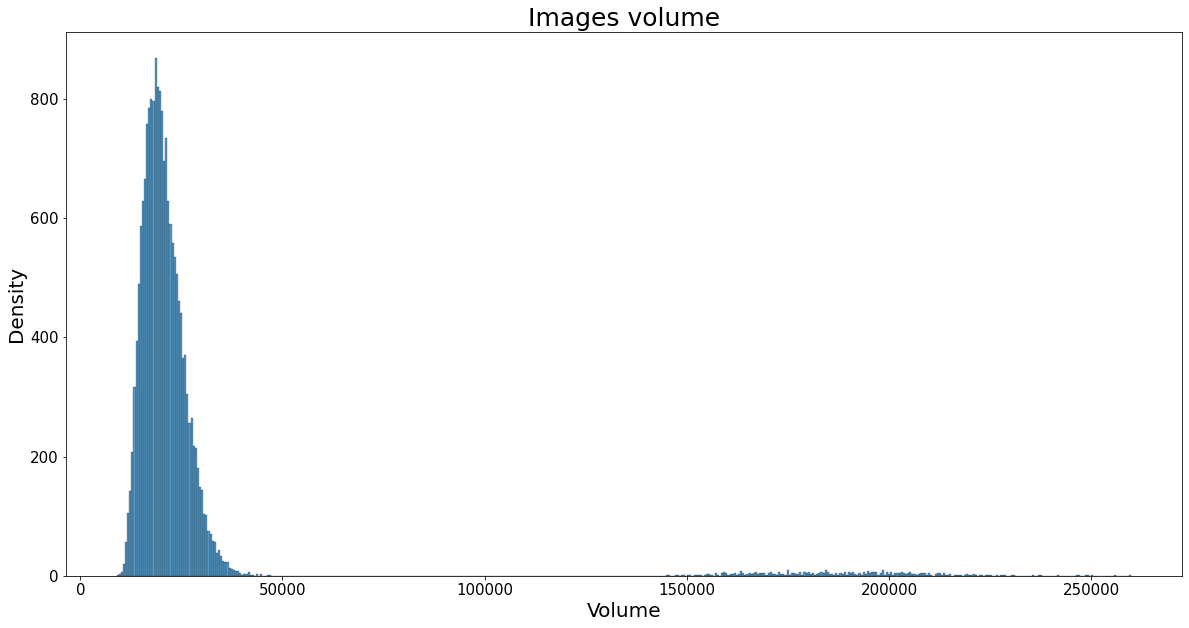

In [47]:
plt.figure(figsize=(20, 10))
sns.histplot(train_image_data_df['volume'])
plt.title('Images volume', fontsize=25)
plt.xlabel('Volume', fontsize=20)
plt.ylabel('Density', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# channel 별 y값과 상관관계

In [152]:
train_label = pd.read_csv('/opt/ml/code/data processing/EDA & Preprocessing/train_label.csv')
train_label

,path,label
0,/opt/ml/code/data/train/images/000001_female_Asian_45/mask3.jpg,4
1,/opt/ml/code/data/train/images/000001_female_Asian_45/mask1.jpg,4
2,/opt/ml/code/data/train/images/000001_female_Asian_45/mask2.jpg,4
3,/opt/ml/code/data/train/images/000001_female_Asian_45/mask4.jpg,4
4,/opt/ml/code/data/train/images/000001_female_Asian_45/normal.jpg,16
...,...,...
18895,/opt/ml/code/data/train/images/006959_male_Asian_19/mask2.jpg,0
18896,/opt/ml/code/data/train/images/006959_male_Asian_19/mask4.jpg,0
18897,/opt/ml/code/data/train/images/006959_male_Asian_19/normal.jpg,12
18898,/opt/ml/code/data/train/images/006959_male_Asian_19/mask5.jpg,0


In [239]:
channel_col_name = [f'channel_R_{i}' for i in range(100)]
train_label_channel_R_df = pd.DataFrame(None, columns=['path']+channel_col_name+['label'])

channel_col_name = [f'channel_G_{i}' for i in range(100)]
train_label_channel_G_df = pd.DataFrame(None, columns=['path']+channel_col_name+['label'])

channel_col_name = [f'channel_B_{i}' for i in range(100)]
train_label_channel_B_df = pd.DataFrame(None, columns=['path']+channel_col_name+['label'])

In [240]:
for index, line in enumerate(train_label.iloc):
    path, label = line
    img = Image.open(path)
    img_trans = torchvision.transforms.Compose([torchvision.transforms.Resize(size=(10, 10)), torchvision.transforms.ToTensor()])(img)
    channel_R_list, channel_G_list, channel_B_list = img_trans[0].flatten().tolist(), img_trans[1].flatten().tolist(), img_trans[2].flatten().tolist()

    train_label_channel_R_df.loc[index] = [path]+channel_R_list+[label]
    train_label_channel_G_df.loc[index] = [path]+channel_G_list+[label]
    train_label_channel_B_df.loc[index] = [path]+channel_B_list+[label]

In [241]:
train_label_channel_R_df.to_csv('/opt/ml/code/data processing/EDA & Preprocessing/train_label_channel_R.csv', index=False)
train_label_channel_G_df.to_csv('/opt/ml/code/data processing/EDA & Preprocessing/train_label_channel_G.csv', index=False)
train_label_channel_B_df.to_csv('/opt/ml/code/data processing/EDA & Preprocessing/train_label_channel_B.csv', index=False)

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(300, 100))
sns.heatmap(train_label_channel_R_df.corr(), ax=axes[0], cmap='Reds', annot=True, fmt='.2f')
sns.heatmap(train_label_channel_G_df.corr(), ax=axes[1], cmap='Greens',annot=True, fmt='.2f')
sns.heatmap(train_label_channel_B_df.corr(), ax=axes[2], cmap='Blues',annot=True, fmt='.2f')
plt.show()